In [385]:
import numpy as np
import os
import pyvisa as pv
from matplotlib import pyplot as plt
%matplotlib widget

In [386]:
rm = pv.ResourceManager()
all_instr = rm.list_resources()

In [387]:
osc = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZD212100403::INSTR')
osc

<'USBInstrument'('USB0::0x1AB1::0x04CE::DS1ZD212100403::0::INSTR')>

In [390]:
osc.write(':WAV:SOUR CHAN2')
osc.write(':WAV:MODE RAW')
osc.write(':WAV:FORM BYTE')
osc.write(':WAV:STAR 1')
osc.write(':WAV:STOP 55001')
osc.write(':WAV:DATA?')

12

In [384]:
osc.write(':RUN')
osc.write(':TIM:MAIN:SCAL 0.000200000')
osc.write(':ACQ:MDEP 60000')
osc.write(':TIM:OFFS 0.001')
osc.write(':SING')

7

In [377]:
osc.query(':TRIG:POS?')

'5000\n'

55013


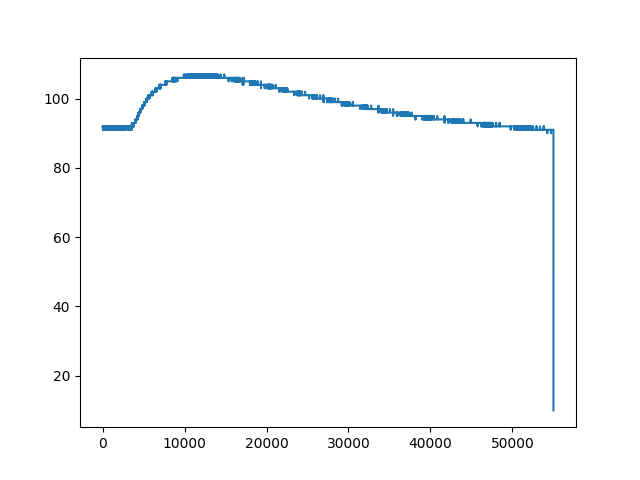

In [391]:
data = osc.read_raw()
print(len(data))
plot_data = np.frombuffer(data, dtype=np.uint8)
ax = plt.subplot()
ax.clear()
ax.plot(plot_data[12:])
plt.show()

In [372]:
osc.write(':ACQ:MDEP 60000')
osc.query(':TIM:MAIN:OFFS?')

'1.0000000e-04\n'

In [115]:
osc.write(':TIM:MAIN:SCAL 0.0001')
osc.query(':TIM:MAIN:SCAL?')

'1.0000000e-04\n'

In [183]:
rm.close()

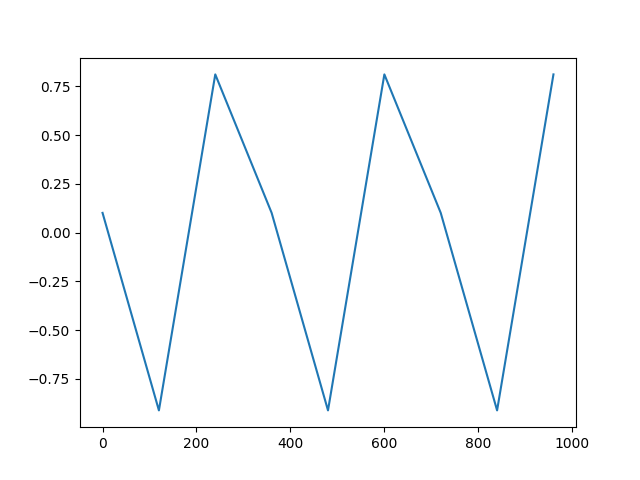

In [358]:
from numpy.random import default_rng

rng = default_rng()
ax = plt.subplot()
ax.clear()

freq = np.pi/180
dt =int(360/3)
x = np.arange(1000)
y = np.sin(x*np.pi/180 + 100*rng.random())
#ax.plot(x,y)
ax.plot(x[::dt],y[::dt])
plt.show()